In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from utilities.produce_interpretable_tree import produce_interpretable_tree


In [2]:

df = pd.read_csv("outputsOfInterest300.csv", sep=",") # Read the CSV file
df = df.drop(columns=['iteration']) # Drop the iteration column
df= df.abs() # Take the absolute value of all columns

folder = "./biomass_results/"
if not os.path.exists(folder): # Create the folder if it does not exist
    os.makedirs(folder)


# Combine 'LTH', 'DH', and 'SpaceHeating' columns
df['LTH'] = df['LTH'] + df['DH'] + df['SpaceHeating']

# Drop the original 'DH' and 'SpaceHeating' columns
df = df.drop(columns=['DH', 'SpaceHeating'])

# Combine 'MTH' and 'HTH' 
df['HTH'] = df['MTH'] + df['HTH']

# Drop the original 'DH' and 'SpaceHeating' columns
df = df.drop(columns=['MTH'])


# drop columns because of too low values
df = df.drop(columns=['CHP', 'LTH', 'HTH', 'rawBiogas', 'coal'])
df = df[:100] # Take the first 100 rows

# Normalize each column
for column in df.columns:
    max_value = df[column].max()
    df[column] = df[column] / max_value

# Now df contains the normalized values
print(df.head())


df.to_csv(folder+"df_input_normalized.csv",sep=";")

   crudeOil       HVC    syngas
0  0.749973  0.893758  0.001645
1  0.686259  0.768360  0.003252
2  0.292712  0.623002  0.649722
3  1.000000  0.799767  0.001195
4  0.698044  0.806245  0.001327


	oil	HVC	syngas	
2& 	0& 	0& 	1& 	\
3& 	1& 	0& 	1& 	\
4& 	1& 	1& 	1& 	\
5& 	0& 	2& 	2& 	\
6& 	1& 	2& 	2& 	\
7& 	1& 	3& 	2& 	\
8& 	2& 	3& 	2& 	\
9& 	2& 	3& 	3& 	\
10& 	3& 	4& 	2& 	\
11& 	4& 	4& 	2& 	\
12& 	3& 	5& 	3& 	\
13& 	3& 	6& 	3& 	\
14& 	5& 	6& 	2& 	\
15& 	5& 	6& 	3& 	\
16& 	6& 	7& 	2& 	\
17& 	5& 	7& 	4& 	\
18& 	6& 	8& 	3& 	\
19& 	9& 	6& 	3& 	\
20& 	8& 	8& 	3& 	\
21& 	7& 	7& 	6& 	\
22& 	5& 	12& 	4& 	\
23& 	8& 	10& 	4& 	\
24& 	8& 	11& 	4& 	\


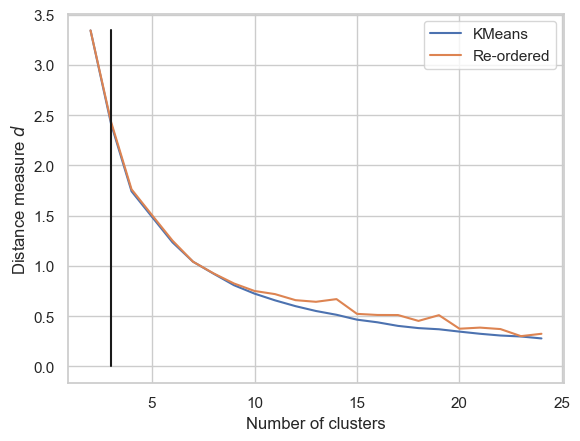

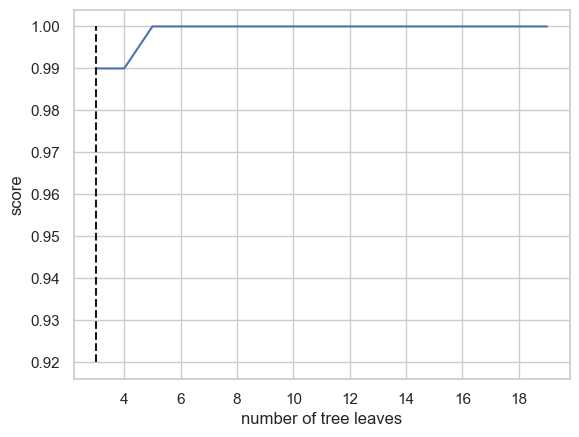

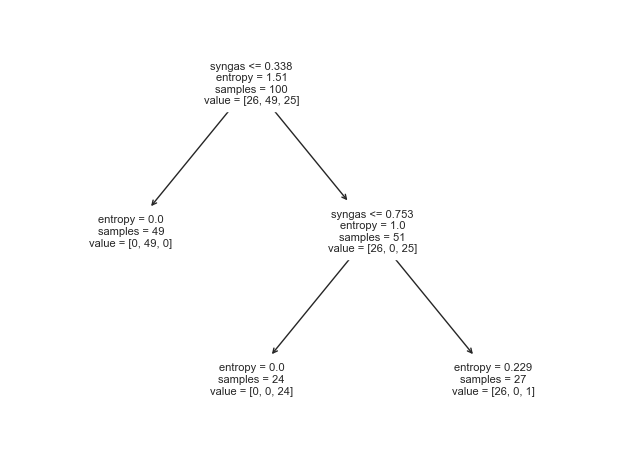

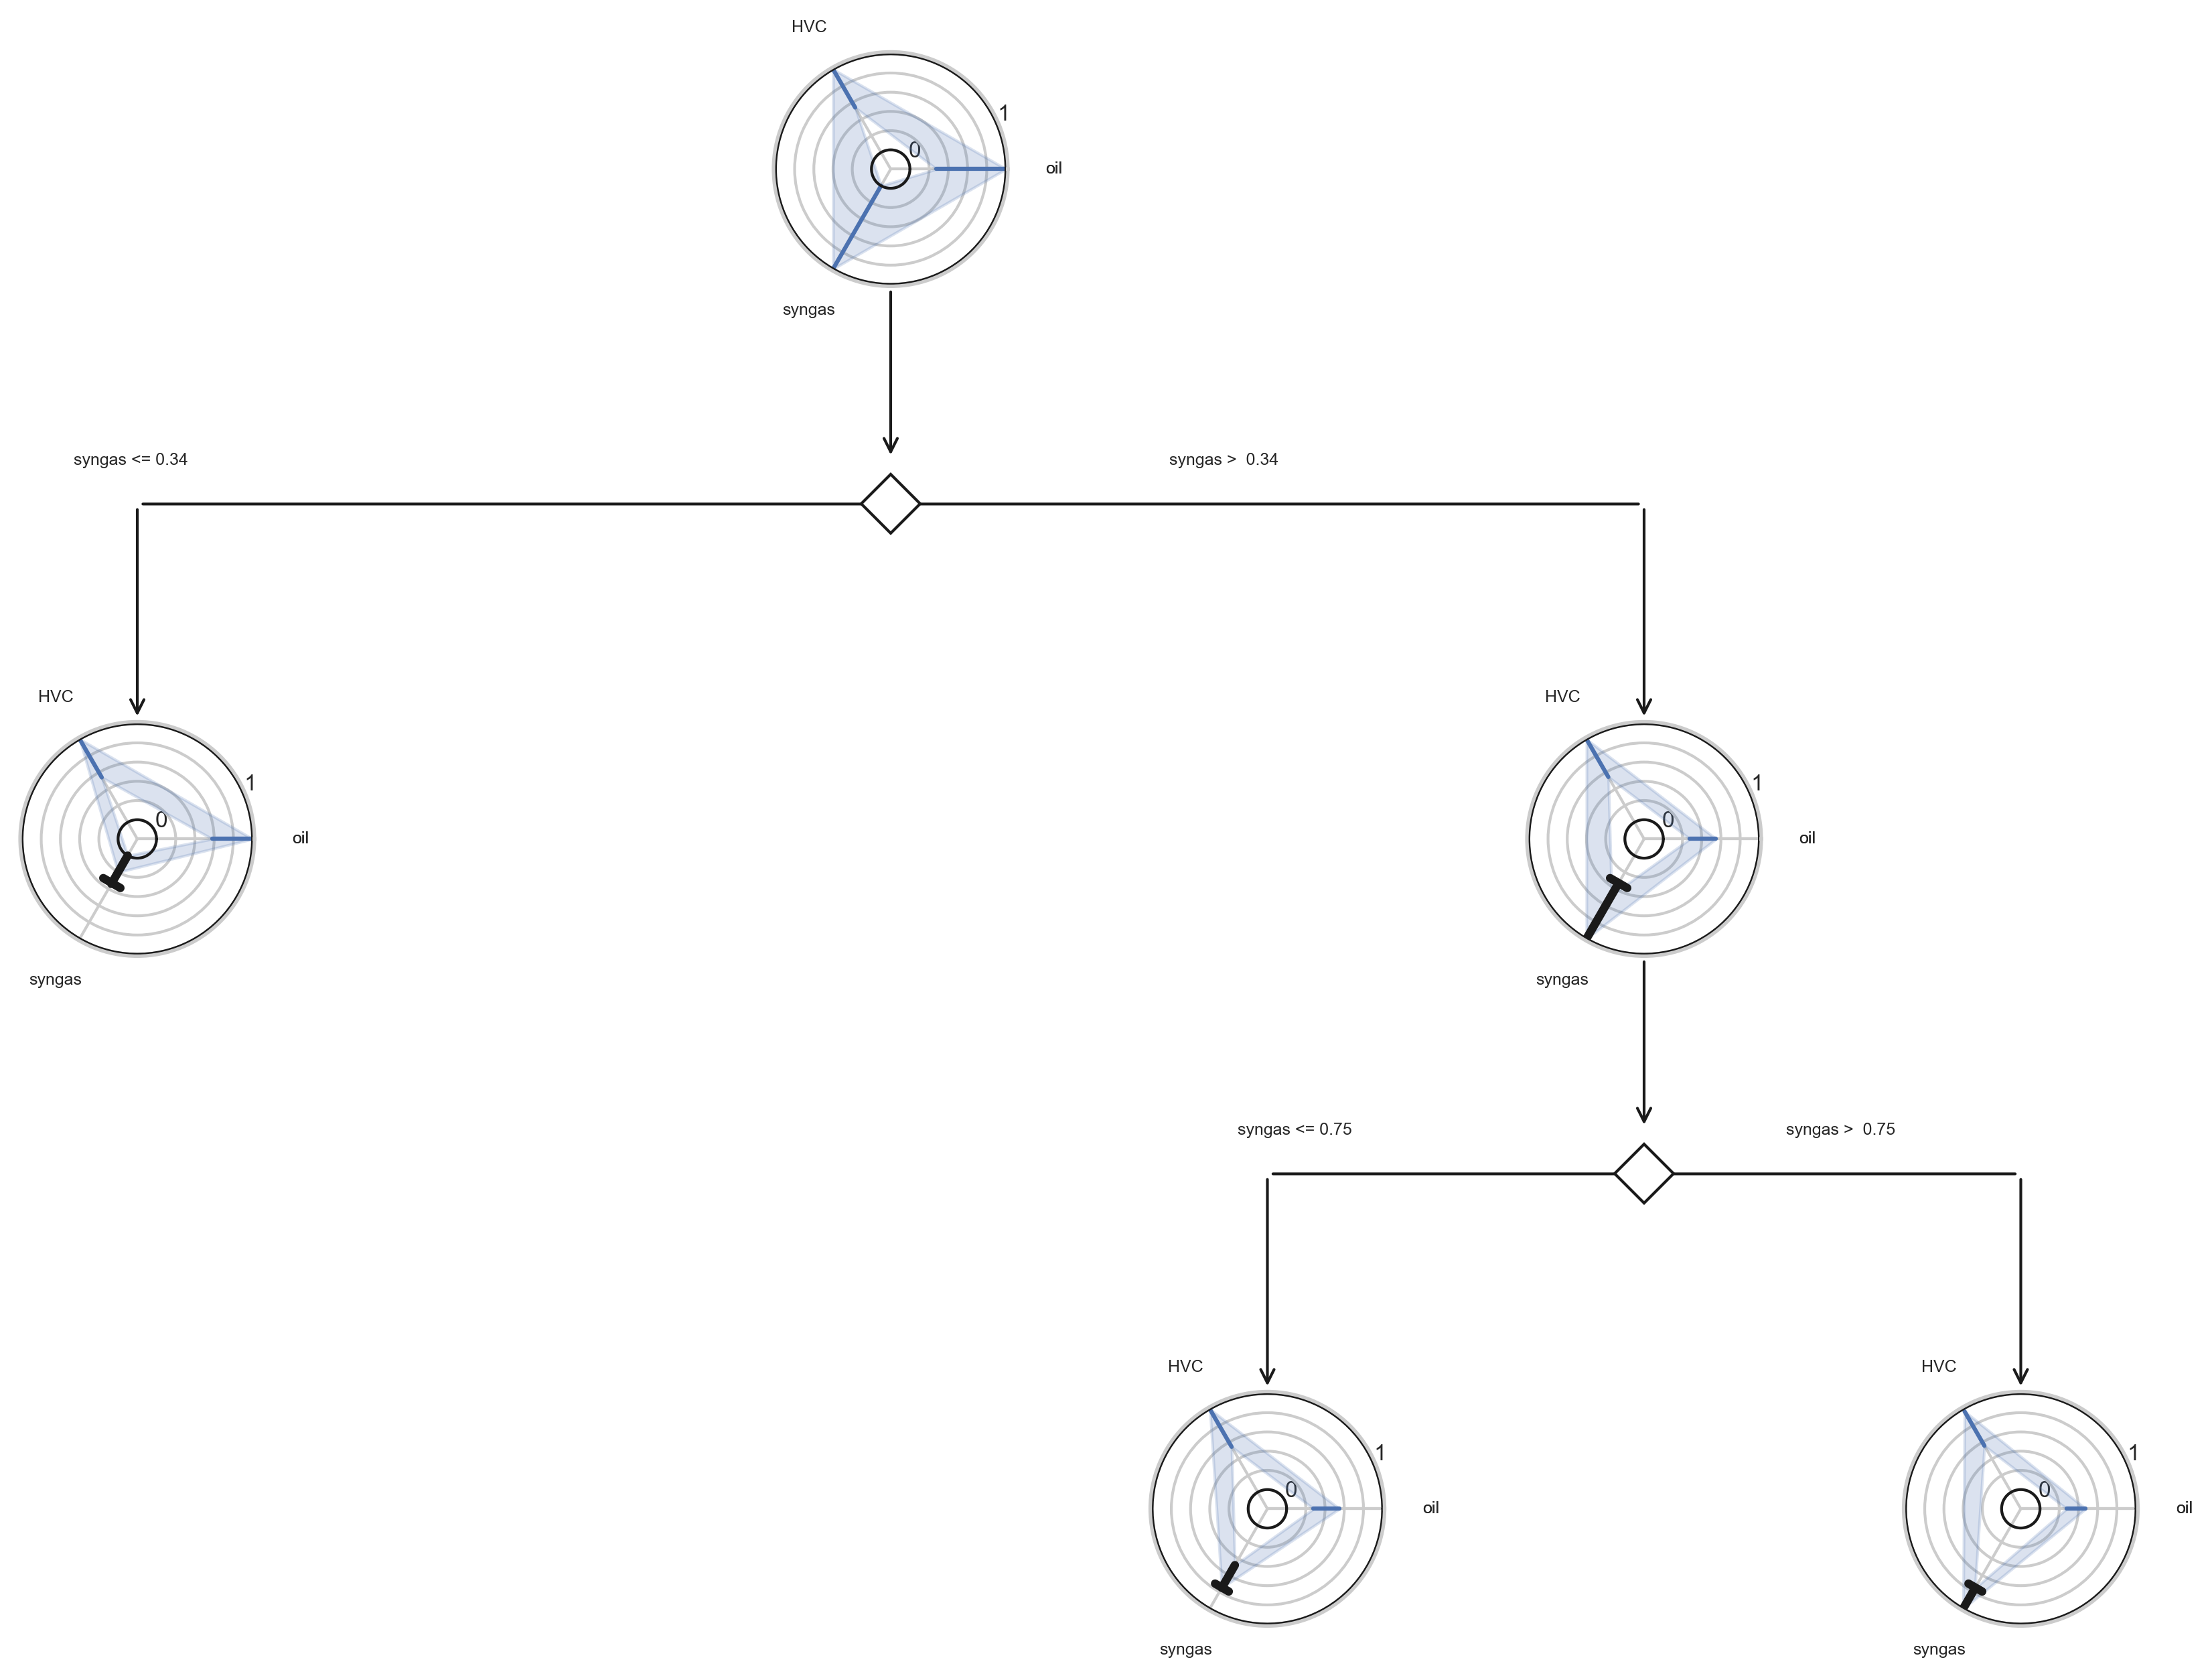

In [3]:
n_cl = 3 # Number of clusters
# short_names = ["oil", "HVC", "CHP", "LTH", "HTH", "biogas", "syngas", "coal"]
short_names = ["oil", "HVC", "syngas"]


# Read the CSV file
folder = "./biomass_results/"
df_input = pd.read_csv(folder+"df_input_normalized.csv",sep=";")
df_input = df_input.set_index("Unnamed: 0")

# Produce the interpretable tree
df_input_with_final_cluster, nodes, choices, decision_space = produce_interpretable_tree(df_input, short_names,n_cl, plot_all_spyders=False, figure_folder=folder)

# df_input_with_final_cluster.to_csv(folder+"df_input_with_final_cluster.csv", sep = ";")
    


+---------------+---------------+---------------+
| Column Name   |     Max Value |     Min Value |
+===============+===============+===============+
| crudeOil      | 452.729       | 125.54        |
+---------------+---------------+---------------+
| HVC           | 620.719       | 334.873       |
+---------------+---------------+---------------+
| CHP           |   0.472094    |   0.187881    |
+---------------+---------------+---------------+
| LTH           |   0.124349    |   0.0458156   |
+---------------+---------------+---------------+
| MTH           |   0.0093208   |   0.000661133 |
+---------------+---------------+---------------+
| HTH           |   0.189756    |   0.0717359   |
+---------------+---------------+---------------+
| DH            |   0.0515053   |   0.0188551   |
+---------------+---------------+---------------+
| SpaceHeating  |   0.000821967 |   0.000174013 |
+---------------+---------------+---------------+
| rawBiogas     |   0.314424    |   0.093915    |


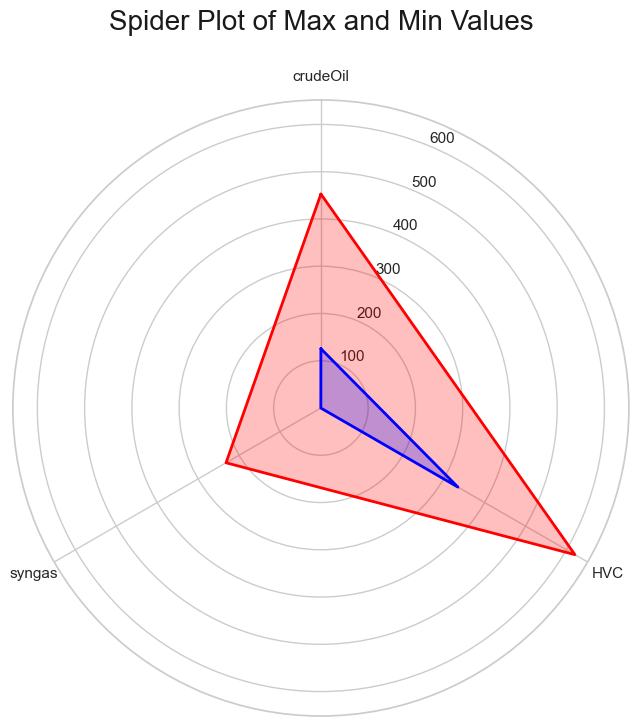

In [4]:
from tabulate import tabulate

df = pd.read_csv("outputsOfInterest300.csv", sep=",") # Read the CSV file
df = df.drop(columns=['iteration']) # Drop the iteration column
df= df.abs() # Take the absolute value of all columns

# Calculate the max and min values for each column
data_max = df.max().values
data_min = df.min().values

# Create a list of lists with column name, max value, and min value
table_data = []
for column in df.columns:
    max_value = df[column].max()
    min_value = df[column].min()
    table_data.append([column, max_value, min_value])

# Print the table
print(tabulate(table_data, headers=["Column Name", "Max Value", "Min Value"], tablefmt="grid"))


# remove column with too low vlaues 
df = df.drop(columns=['CHP', 'LTH', 'MTH' , 'HTH', 'DH', 'SpaceHeating', 'rawBiogas', 'coal'])

# Calculate the max and min values for each column
data_max = df.max().values
data_min = df.min().values

# Number of variables
num_vars = len(df.columns)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable + add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], df.columns)

# Plot data
values_max = data_max.tolist()
values_max += values_max[:1]
ax.plot(angles, values_max, color='red', linewidth=2, linestyle='solid', label='Max')

values_min = data_min.tolist()
values_min += values_min[:1]
ax.plot(angles, values_min, color='blue', linewidth=2, linestyle='solid', label='Min')

# Fill area
ax.fill(angles, values_max, color='red', alpha=0.25)
ax.fill(angles, values_min, color='blue', alpha=0.25)

# Add a title
plt.title('Spider Plot of Max and Min Values', size=20, color='k', y=1.1)

# Show the plot
plt.show()
